##### Lead Scoring Assignment

##### Step1 : Importing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 40)

In [3]:
lead_df = pd.read_csv('Leads.csv')

##### Step 2: Inspecting the dataframe

In [4]:
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

##### A few quick observations
- The column Prospect ID is looking redundant
- There seems to be Null values
- There seems to be data with value as Select 
- There are columns having values as Yes/No
- There are columns having categorical values

In [5]:
#Let us check the count of the rows and columns
lead_df.shape

(9240, 37)

##### The dataset consists of 9240 rows and 37 colums

In [6]:
#Let us check the null data count
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### There are many columns which have Null values which will need to be handled befoe we proceed to model building

##### Step 3 : Data Preparation

##### Deleting redundant columns

##### The column Prospect ID is not going to help in any predictions hence let us delete the same. Also we already have another identifier Lead Number to identify the prospects

In [7]:
# Dropping the column
lead_df = lead_df.drop(['Prospect ID'],axis=1)

##### As given in the problem statement there are a few columns which has a value Select since the professionals had not chosen any value for the same while filling the form
Now this is as good as null , so as a first step let us replace Select with nan so that we will get correct count of the null values

##### Handling data with value as 'Select'

In [8]:
# Replace Select with Null
lead_df = lead_df.replace('Select',np.nan)

##### Handling Null values

In [9]:
# Now let us calculate the final % of the null values in each coulmn and arange them in descending order
round(100*(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df)),2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

In [10]:
#As seen from the above the columns - How did you hear about X Education and Lead Profile has a very large % of null values(>70%).
# Hence these column will not help in the analysis so let us go ahead and drop these columns 
lead_df = lead_df.drop(['How did you hear about X Education','Lead Profile'],axis=1)

In [11]:
#Now let is re-look at the  columns and the null value %
round(100*(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df)),2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Get update

In [12]:
#Now for the columns which has null values > 10 % let us visualize the same and impute the null values

In [13]:
#First let us create a list of such columns
null_high_columns = []
for c in lead_df.columns:
    if round(100*(lead_df[c].isnull().sum()/len(lead_df)),2) > 10:
        null_high_columns.append(c)

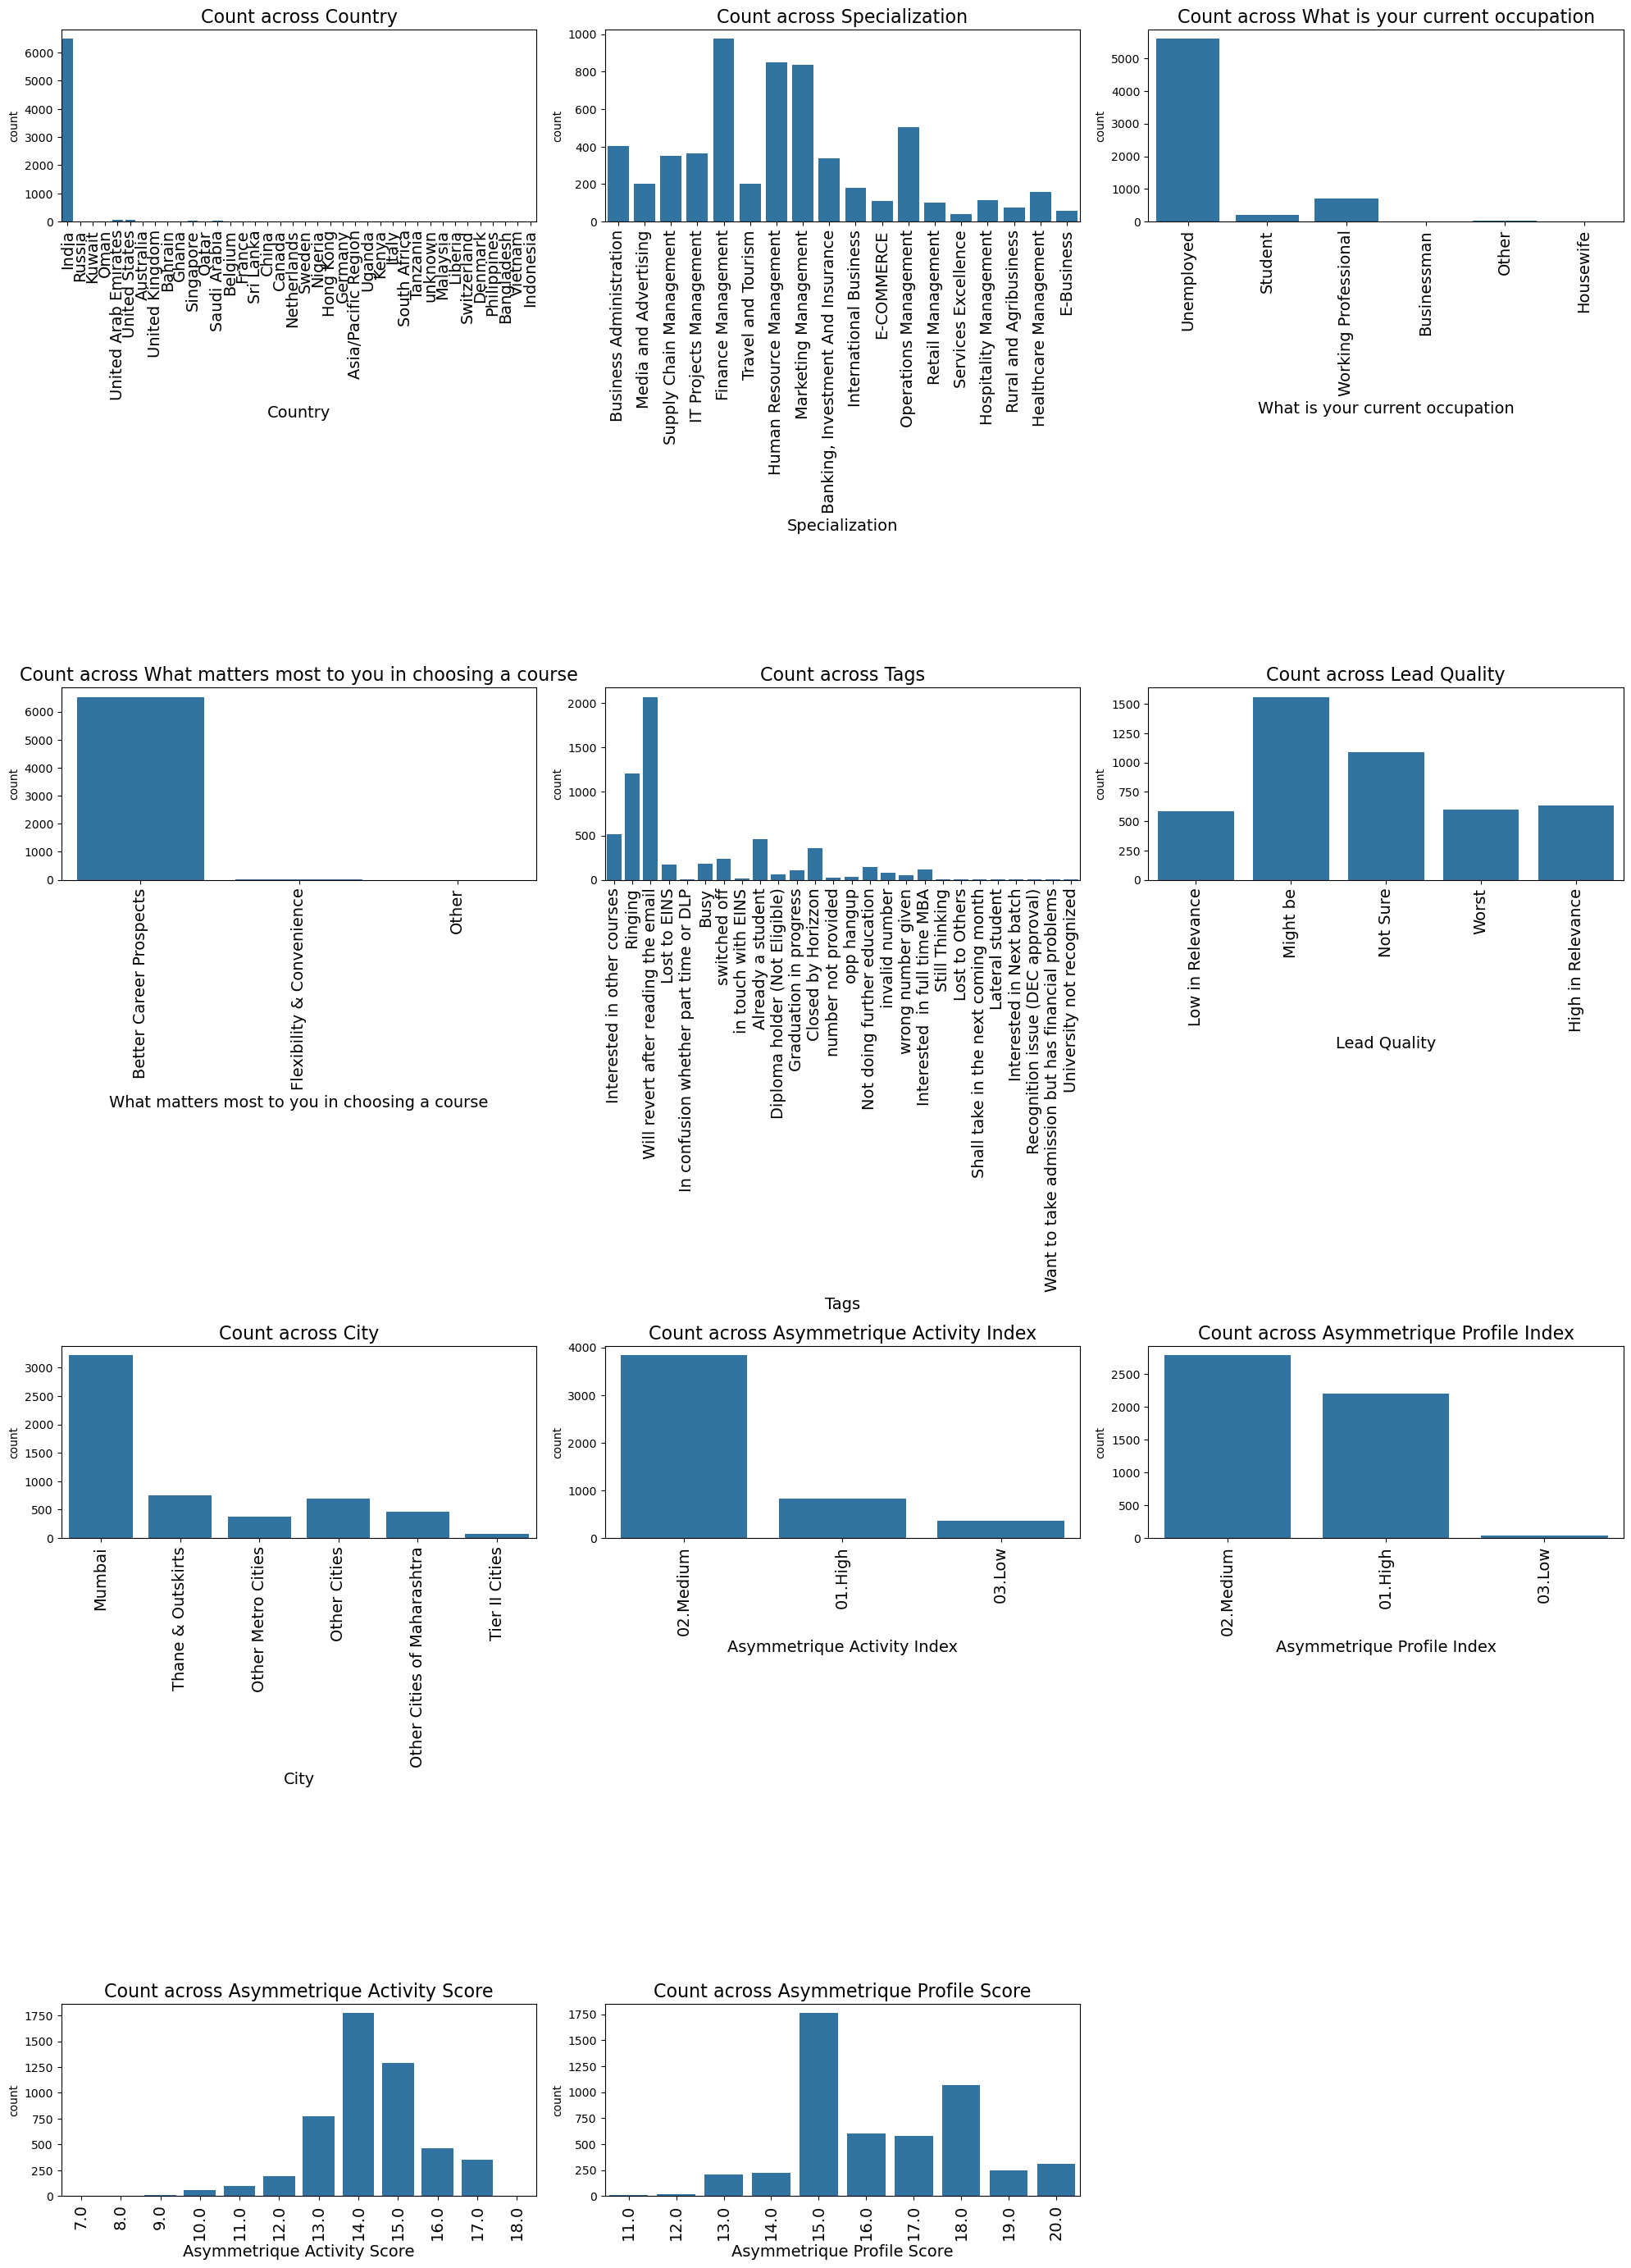

In [14]:
# Now let us visualize the variables
def displayplot(x, fig):
    plt.subplot(5,3, fig)
    sns.countplot(data=lead_df,x=x)
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90,size=14)
    
plt.figure(figsize=(20,35))
j=1
for i in null_high_columns:
    displayplot(i,j)
    j=j+1
plt.tight_layout()


In [15]:
#Let us take the first column country
lead_df.Country.unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [16]:
#As seen from the above visualization and list of unique values , the professionals are mostly from India hence let us impute the nan values with India which has the highest frequency
lead_df['Country']=lead_df['Country'].replace(np.nan,'India')

In [17]:
#Let us check the null count for Country
lead_df['Country'].isnull().sum()

0

In [18]:
#Now let us take the column Specialization
lead_df.Specialization.unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [19]:
#For specialization we cannot go directly with the mode value since it is quite possible that the prospect had not worked in any industry before.
# Hence let us create a new category 'Others' for nan values
lead_df['Specialization']=lead_df['Specialization'].replace(np.nan,'Others')

In [20]:
#Let us check the column - What is your current occupation
lead_df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [21]:
# Here we already have a category called others. Hence we can impute nan as Others but looking at the data looks like the majority of the prospects are Unemployed
# Hence let us replace nan with Unemployed
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [22]:
#Now let us take the column What matters most to you in choosing a course
lead_df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [23]:
# Here we already have a category called others. Hence we can impute nan as Others but looking at this question from the prospects prespective they will typically enroll for  course for Better career prospects which is also the highest frequency in this dataset 
# Hence let us replace nan with Better Career Prospects
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [24]:
#Now let us take the column Tags
lead_df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [25]:
# Here the highest lead_df['Tags']mode is - Will revert after reading the email as evident from the countplot. Hence we will go ahead by using this value for the nan values
lead_df['Tags'] = lead_df['Tags'].replace(np.nan,'Will revert after reading the email')

In [26]:
#Now let us take the column Lead Quality
lead_df['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [27]:
#Here the highest frquency as per the countplot is Might be and this seems to the logical value to be imputed for the null values since as per the data dictionary - Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan,'Might be')

In [28]:
#Now let us take the column Lead City
lead_df['City'].unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [29]:
#In the case of City the highest frequency is for Mumbai , hence we will use this value for null values
lead_df['City'] = lead_df['City'].replace(np.nan,'Mumbai')

In [30]:
##### Now let us take the columns - Asymmetrique Activity Index , Asymmetrique Activity Score , Asymmetrique Profile Index , Asymmetrique Profile Score

In [31]:
# Column - Asymmetrique Activity Index
lead_df['Asymmetrique Activity Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [32]:
# Column - Asymmetrique Activity Score
lead_df['Asymmetrique Activity Score'].unique()

array([15., 14., 13., 17., 16., 11., 12., 10.,  9.,  8., 18., nan,  7.])

In [33]:
# Column - Asymmetrique Profile Index
lead_df['Asymmetrique Profile Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [34]:
# Column - Asymmetrique Profile Score
lead_df['Asymmetrique Profile Score'].unique()

array([15., 20., 17., 18., 14., 16., 13., 19., 12., nan, 11.])

##### From the information in these columns it does't seem to provide any valuable information which can help in the prediction
Hence instead of imputing null values it is better to drop these columns

In [35]:
# Dropping the columns
lead_df = lead_df.drop(['Asymmetrique Activity Index' , 'Asymmetrique Activity Score' , 'Asymmetrique Profile Index' , 'Asymmetrique Profile Score'],axis=1)

In [36]:
#Now let us again look at the columns and null values sorted in descending order
round(100*(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df)),2)

Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Update me on Supply Chain Content                0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
Receive More Updates About Our Courses           0.00
Tags                                             0.00
Lead Quality                                     0.00
Lead Number                                      0.00
X Education Forums                               0.00
Get updates on DM Content                        0.00
City                                             0.00
I agree to pay the amount through cheque         0.00
A free copy of Mastering The Interview           0.00
Newspaper                                        0.00
Magazine                                         0.00
Newspaper Article           

##### The % of null values for the columns - TotalVisits , Page Views Per Visit , Last Activity ,Lead Source is very less. Hence let us inpute the null values with mode

In [37]:
# Imputing the null values
lead_df['TotalVisits'] = lead_df['TotalVisits'].replace(np.nan,lead_df['TotalVisits'].mode()[0])
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].replace(np.nan,lead_df['Page Views Per Visit'].mode()[0])
lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan,lead_df['Last Activity'].mode()[0])
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan,lead_df['Lead Source'].mode()[0])

In [38]:
#Now let us again look at the columns and null values sorted in descending order
round(100*(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df)),2)

Lead Number                                      0.0
Lead Origin                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Lead Quality                                     0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation               

##### So we have handled all the null values

In [39]:
#Let us check the shape of the dataframe
lead_df.shape

(9240, 30)

##### As seen from above we have retained all the rows and dropped 7 columns

In [40]:
# Let us look at the column datatypes
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

##### As seen above we have many columns of datatype Object which will need to be convered into appropriate datatypes
##### Before that let us check for the outliers

##### Treating the outliers

In [41]:
# Let us check for the outliers in the continuous variables
num_cols = lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [42]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.394156                   487.698268              2.327787
std       4.836682                   548.021466              2.164258
min       0.000000                     0.000000              0.000000
25%       0.000000                    12.000000              0.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
90%       7.000000                  1380.000000              5.000000
95%      10.000000                  1562.000000              6.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

In [43]:
##### As seen above outliers are present . Hence let us handle the outliers

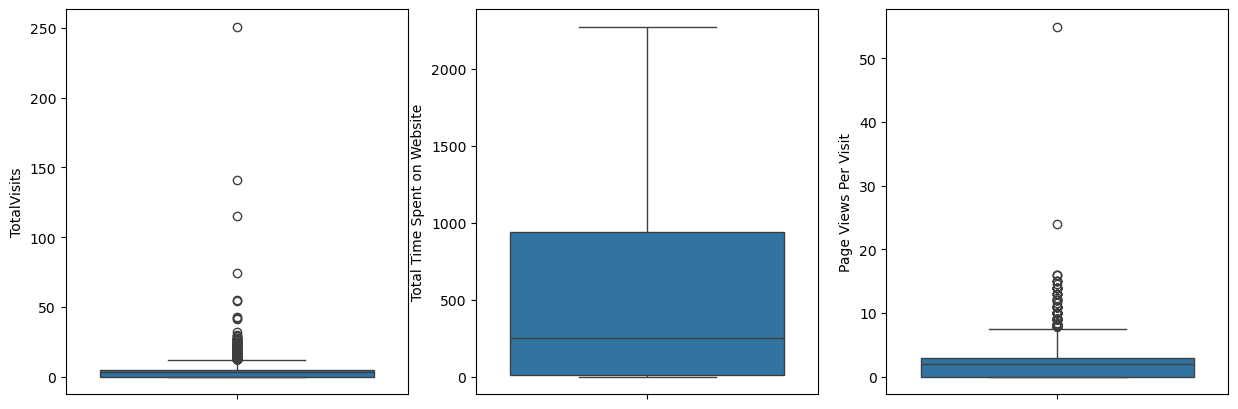

In [44]:
# Let us Plot the same for better visualization
plt.figure(figsize = (15, 5))
i=1
for col in num_cols:
    plt.subplot(1,3, i)
    sns.boxplot(lead_df[col])
    i=i+1
plt.show()

In [45]:
#Now let us remove the outliers from the columns -  'TotalVisits' and 'Page Views Per Visit'
# We will remove statistical outliers

# outlier treatment for TotalVisits
Q1 = lead_df['TotalVisits'].quantile(0.25)
Q3 = lead_df['TotalVisits'].quantile(0.70)
IQR = Q3 - Q1
lead_df = lead_df[(lead_df['TotalVisits'] >= Q1 - 1.5*IQR) & (lead_df['TotalVisits'] <= Q3 + 1.5*IQR)]

# outlier treatment for Total Time Spent on Website
Q1 = lead_df['Total Time Spent on Website'].quantile(0.25)
Q3 = lead_df['Total Time Spent on Website'].quantile(0.70)
IQR = Q3 - Q1
lead_df = lead_df[(lead_df['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (lead_df['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]

# outlier treatment for Page Views Per Visit
Q1 = lead_df['Page Views Per Visit'].quantile(0.25)
Q3 = lead_df['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
lead_df = lead_df[(lead_df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead_df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

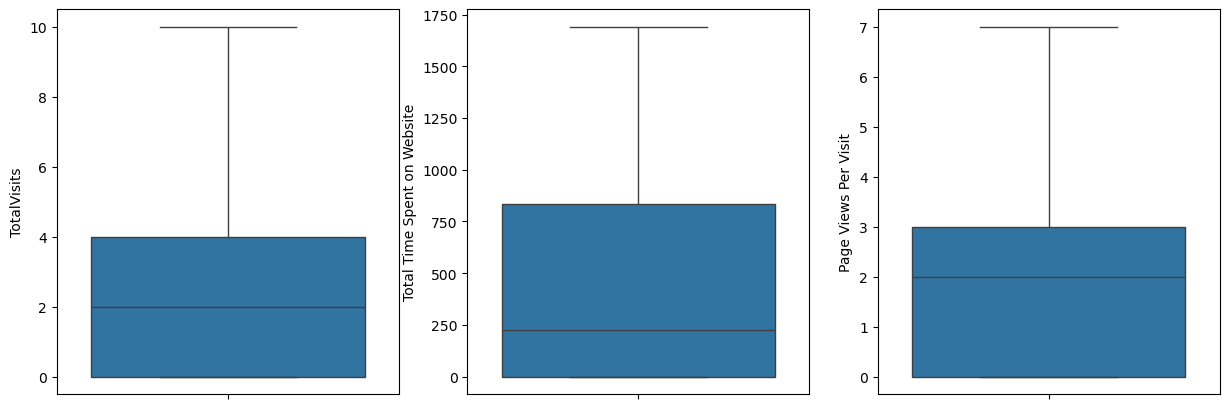

In [46]:
#Let us now look at the outliers
plt.figure(figsize = (15, 5))
i=1
for col in num_cols:
    plt.subplot(1,3, i)
    sns.boxplot(lead_df[col])
    i=i+1
plt.show()


##### So now we have handled the outliers from the continuous variables

In [47]:
#Now let us inspect the dataframe once
lead_df.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country  \
0                   0.0  Page Visited on Website   India   
1                   2.5             Email Opened   India   
2                   2.0             Email Opened   India   
3                   1.0              Unreachable   India   
4                   1.0        Converted to Lead   India   

            Specialization What is your current occupation  \
0                   Others                      Unemployed   
1                   Others                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Others                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Might be   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No  Mumbai   
1                                No                        No  Mumbai   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0               

In [48]:
#Let us check the shape of the dataframe
lead_df.shape

(8528, 30)

In [49]:
##### Count of Rows to be used for model building 
print(8528/9240 * 100)

92.2943722943723


##### As seen above we are using 92% of the data for model building

##### Converting Yes/NO variables to 1/0

In [50]:
#Let us convert Yes/No features to 1/0
binary_cols = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

lead_df[binary_cols] = lead_df[binary_cols].apply(binary_map) 

In [51]:
lead_df.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country  \
0                   0.0  Page Visited on Website   India   
1                   2.5             Email Opened   India   
2                   2.0             Email Opened   India   
3                   1.0              Unreachable   India   
4                   1.0        Converted to Lead   India   

            Specialization What is your current occupation  \
0                   Others                      Unemployed   
1                   Others                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Others                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Might be   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content    City  \
0                                  0                          0  Mumbai   
1                                  0                          0  Mumbai   
2                                  0                          0  Mumbai   
3                                  0                          0  Mumbai   
4                                  0                          0  Mumbai   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   

In [52]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8528 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    8528 non-null   int64  
 1   Lead Origin                                    8528 non-null   object 
 2   Lead Source                                    8528 non-null   object 
 3   Do Not Email                                   8528 non-null   int64  
 4   Do Not Call                                    8528 non-null   int64  
 5   Converted                                      8528 non-null   int64  
 6   TotalVisits                                    8528 non-null   float64
 7   Total Time Spent on Website                    8528 non-null   int64  
 8   Page Views Per Visit                           8528 non-null   float64
 9   Last Activity                                  8528 non-n

##### Inspecting the object type columns

In [53]:
#Now let us get the object type columns and inspect them
obj_cols = list(lead_df.select_dtypes(include='object'))
obj_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [54]:
#Let us analyze the column - Lead Origin
lead_df['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4364
API                        3411
Lead Add Form               700
Lead Import                  53
Name: count, dtype: int64

##### The categories for Lead Origin seem to be OK. So we can proceed to create dummy variables for the same

In [55]:
#Let us analyze the column - Lead Source
lead_df['Lead Source'].value_counts()

Lead Source
Google               2695
Direct Traffic       2314
Olark Chat           1739
Organic Search        938
Reference             518
Welingak Website      141
Referral Sites        104
Facebook               53
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [56]:
# As seen from above Google and google is the same and can be consolidated.
# Also the categories - bing , Click2call , Social Media , Live Chat , youtubechannel , Press_Release , testone , Pay per Click Ads , welearnblog_Home , WeLearn , blog , NC_EDM can be clubbed together into Other_Source. 
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace([ 'bing' , 'Click2call' , 'Social Media' , 'Live Chat' , 'youtubechannel' , 'Press_Release' , 'testone' , 'Pay per Click Ads' , 'welearnblog_Home' , 'WeLearn' , 'blog' , 'NC_EDM'], 'Other_Source')

In [57]:
lead_df['Lead Source'].value_counts()

Lead Source
Google              2700
Direct Traffic      2314
Olark Chat          1739
Organic Search       938
Reference            518
Welingak Website     141
Referral Sites       104
Facebook              53
Other_Source          21
Name: count, dtype: int64

##### The categories for Lead Source seem to be OK. So we can proceed to create dummy variables for the same

In [58]:
# Let us analyze the column - Last Activity
lead_df['Last Activity'].value_counts()

Last Activity
Email Opened                    3271
SMS Sent                        2527
Olark Chat Conversation          941
Page Visited on Website          515
Converted to Lead                415
Email Bounced                    312
Email Link Clicked               251
Form Submitted on Website        108
Unreachable                       86
Unsubscribed                      59
Had a Phone Conversation          25
Approached upfront                 9
View in browser link Clicked       4
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Email Marked Spam                  1
Name: count, dtype: int64

In [59]:
# As can be seen from above the categories - Had a Phone Conversation , Approached upfront , View in browser link Clicked , Email Received , Visited Booth in Tradeshow , Resubscribed to emails , Email Marked Spam can be clubbed into Other_Activity 
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation' , 'Approached upfront' , 'View in browser link Clicked' , 'Email Received' , 'Visited Booth in Tradeshow' , 'Resubscribed to emails' , 'Email Marked Spam'], 
                                                     'Other_Activity')

In [60]:
lead_df['Last Activity'].value_counts()

Last Activity
Email Opened                 3271
SMS Sent                     2527
Olark Chat Conversation       941
Page Visited on Website       515
Converted to Lead             415
Email Bounced                 312
Email Link Clicked            251
Form Submitted on Website     108
Unreachable                    86
Unsubscribed                   59
Other_Activity                 43
Name: count, dtype: int64

##### The categories for Last Activity seem to be OK. So we can proceed to create dummy variables for the same

In [61]:
#Let us analyze the column - Country
lead_df['Country'].value_counts(normalize=True)

Country
India                   0.969160
United States           0.007622
United Arab Emirates    0.005629
Singapore               0.002580
Saudi Arabia            0.002111
United Kingdom          0.001524
Australia               0.001407
Qatar                   0.001055
Bahrain                 0.000821
Oman                    0.000704
Hong Kong               0.000704
France                  0.000586
Canada                  0.000469
unknown                 0.000469
Germany                 0.000469
Nigeria                 0.000469
Kuwait                  0.000469
South Africa            0.000352
China                   0.000235
Sweden                  0.000235
Belgium                 0.000235
Ghana                   0.000235
Asia/Pacific Region     0.000235
Uganda                  0.000235
Bangladesh              0.000235
Italy                   0.000235
Philippines             0.000235
Liberia                 0.000117
Vietnam                 0.000117
Denmark                 0.000117
Sw

In [62]:
# The data in this column is highly skewed. Hence it will not help in our analysis. So let us go ahead and drop this column
lead_df = lead_df.drop(['Country'],axis=1)

In [63]:
#Let us analyze the column - Specialization
lead_df['Specialization'].value_counts()

Specialization
Others                               3269
Finance Management                    883
Marketing Management                  776
Human Resource Management             766
Operations Management                 465
Business Administration               363
IT Projects Management                333
Supply Chain Management               307
Banking, Investment And Insurance     291
Media and Advertising                 175
Travel and Tourism                    171
International Business                162
Healthcare Management                 140
Hospitality Management                 99
E-COMMERCE                             98
Retail Management                      84
Rural and Agribusiness                 61
E-Business                             50
Services Excellence                    35
Name: count, dtype: int64

##### The categories for Specialization seem to be OK. So we can proceed to create dummy variables for the same

In [64]:
# Let us analyze the column - What is your current occupation
lead_df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              7656
Working Professional     642
Student                  201
Other                     13
Housewife                 10
Businessman                6
Name: count, dtype: int64

##### The categories for What is your current occupation seem to be OK. So we can proceed to create dummy variables for the same

In [65]:
# Let us analyze the column - What matters most to you in choosing a course
lead_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      8525
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [66]:
# The data in this column is highly skewed hence it will not help in the analysis. Hence ley us go ahead and drop this column
lead_df = lead_df.drop(['What matters most to you in choosing a course'],axis=1)

In [67]:
# Let us analyze the column Tags
lead_df['Tags'].value_counts()

Tags
Will revert after reading the email                  5019
Ringing                                              1108
Interested in other courses                           478
Already a student                                     448
Closed by Horizzon                                    312
switched off                                          225
Busy                                                  166
Lost to EINS                                          156
Not doing further education                           134
Interested  in full time MBA                          108
Graduation in progress                                103
invalid number                                         72
Diploma holder (Not Eligible)                          60
wrong number given                                     40
opp hangup                                             31
number not provided                                    25
in touch with EINS                                     11
Lost to O

In [68]:
# Invalid number and wrong number is one and the same , let us club it together
# Also we can club Ringing , switched off , busy 
# The categories which have lesser representation can be clubbed under Other_Tags

lead_df['Tags'] = lead_df['Tags'].replace(['wrong number given'],'invalid number')
lead_df['Tags'] = lead_df['Tags'].replace(['switched off','busy'],'Ringing')
lead_df['Tags'] = lead_df['Tags'].replace(['Diploma holder (Not Eligible)','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','In confusion whether part time or DLP','Want to take admission but has financial problems','Lateral student','Interested in Next batch','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Other_Tags')

In [69]:
lead_df['Tags'].value_counts()

Tags
Will revert after reading the email    5019
Ringing                                1333
Interested in other courses             478
Already a student                       448
Closed by Horizzon                      312
Busy                                    166
Other_Tags                              159
Lost to EINS                            156
Not doing further education             134
invalid number                          112
Interested  in full time MBA            108
Graduation in progress                  103
Name: count, dtype: int64

##### The categories for Tags seem to be OK. So we can proceed to create dummy variables for the same

In [70]:
# Let us analyze the column - 'Lead Quality'
lead_df['Lead Quality'].value_counts()

Lead Quality
Might be             5877
Not Sure              992
Worst                 572
High in Relevance     559
Low in Relevance      528
Name: count, dtype: int64

##### The categories for Lead Quality seem to be ok. So we can proceed to create dummy variales for the same

In [71]:
# Let us analyze the column City
lead_df['City'].value_counts()

City
Mumbai                         6412
Thane & Outskirts               670
Other Cities                    622
Other Cities of Maharashtra     413
Other Metro Cities              345
Tier II Cities                   66
Name: count, dtype: int64

##### The categories for City seem to be OK. So we can proceed to create dummy variables for the same

In [72]:
# Let us analyze the column - Last Notable Activity
lead_df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3211
Email Opened                    2606
SMS Sent                        1997
Page Visited on Website          237
Olark Chat Conversation          170
Email Link Clicked               160
Email Bounced                     57
Unsubscribed                      45
Unreachable                       29
Had a Phone Conversation          10
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Email Marked Spam                  1
Name: count, dtype: int64

In [73]:
#Let us club the major categories and club the minor ones in Other_Last Notable Activity
lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(['Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received','Email Marked Spam'],'Other_Last Notable Activity')

In [74]:
lead_df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                       3211
Email Opened                   2606
SMS Sent                       1997
Page Visited on Website         237
Olark Chat Conversation         170
Email Link Clicked              160
Email Bounced                    57
Unsubscribed                     45
Unreachable                      29
Had a Phone Conversation         10
Other_Last Notable Activity       6
Name: count, dtype: int64

##### Now the categories for - Last Notable Activity are OK and We can proceed to creation of dummy variables 

In [75]:
# Let us analyze the column - Search
lead_df['Search'].value_counts()

Search
0    8522
1       6
Name: count, dtype: int64

In [76]:
# The data is highly skewed with mostly No. Hence no inference can be drwan from this variable , so we will drop this column
lead_df = lead_df.drop('Search',axis=1)

In [77]:
# Let us analyze the column - Magazine
lead_df['Magazine'].value_counts()

Magazine
0    8528
Name: count, dtype: int64

In [78]:
# The data is highly skewed with only No. Hence no inference can be drwan from this variable , so we will drop this column
lead_df = lead_df.drop('Magazine',axis=1)

In [79]:
# Let us analyze the column - Newspaper Article
lead_df['Newspaper Article'].value_counts()

Newspaper Article
0    8528
Name: count, dtype: int64

In [80]:
# The data is highly skewed with only No. Hence no inference can be drwan from this variable , so we will drop this column
lead_df = lead_df.drop('Newspaper Article',axis=1)

In [81]:
# Let us analyze the column - X Education Forums
lead_df['X Education Forums'].value_counts()

X Education Forums
0    8528
Name: count, dtype: int64

In [82]:
# The data is highly skewed with only No. Hence no inference can be drwan from this variable , so we will drop this column
lead_df = lead_df.drop('X Education Forums',axis=1)

In [83]:
# Let us analyze the column - Newspaper
lead_df['Newspaper'].value_counts()

Newspaper
0    8528
Name: count, dtype: int64

In [84]:
# The data is highly skewed with only No. Hence no inference can be drwan from this variable , so we will drop this column
lead_df = lead_df.drop('Newspaper',axis=1)

In [85]:
# Let us analyze the column - Digital Advertisement
lead_df['Digital Advertisement'].value_counts()

Digital Advertisement
0    8526
1       2
Name: count, dtype: int64

In [86]:
# The data is highly skewed with Mostly No. Hence no inference can be drwan from this variable , so we will drop this column
lead_df = lead_df.drop('Digital Advertisement',axis=1)

In [87]:
# Let us analyze the column - Through Recommendations
lead_df['Through Recommendations'].value_counts()

Through Recommendations
0    8525
1       3
Name: count, dtype: int64

In [88]:
# The data is highly skewed with Mostly No. Hence no inference can be drwan from this variable , so we will drop this column
lead_df = lead_df.drop('Through Recommendations',axis=1)

In [89]:
# Let us analyze the column - Receive More Updates About Our Courses
lead_df['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
0    8528
Name: count, dtype: int64

In [90]:
# The data is highly skewed with Only No. Hence no inference can be drwan from this variable , so we will drop this column
lead_df = lead_df.drop('Receive More Updates About Our Courses',axis=1)

In [91]:
# Let us analyze the column - Update me on Supply Chain Content
lead_df['Update me on Supply Chain Content'].value_counts()

Update me on Supply Chain Content
0    8528
Name: count, dtype: int64

In [92]:
# The data is highly skewed with Only No. Hence no inference can be drwan from this variable , so we will drop this column
lead_df = lead_df.drop('Update me on Supply Chain Content',axis=1)

In [93]:
# Let us analyze the column - Get updates on DM Content
lead_df['Get updates on DM Content'].value_counts()

Get updates on DM Content
0    8528
Name: count, dtype: int64

In [94]:
# The data is highly skewed with Only No. Hence no inference can be drwan from this variable , so we will drop this column
lead_df = lead_df.drop('Get updates on DM Content',axis=1)

In [95]:
# Let us analyze the column - I agree to pay the amount through cheque
lead_df['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
0    8528
Name: count, dtype: int64

In [96]:
# The data is highly skewed with Only No. Hence no inference can be drwan from this variable , so we will drop this column
lead_df = lead_df.drop('I agree to pay the amount through cheque',axis=1)

In [97]:
# Let us analyze the column - A free copy of Mastering The Interview
lead_df['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
0    6002
1    2526
Name: count, dtype: int64

In [98]:
# The data is highly skewed with Mostly No. Hence no inference can be drwan from this variable , so we will drop this column
lead_df = lead_df.drop('A free copy of Mastering The Interview',axis=1)

In [99]:
#Let us once take a look at the remaining columns
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8528 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      8528 non-null   int64  
 1   Lead Origin                      8528 non-null   object 
 2   Lead Source                      8528 non-null   object 
 3   Do Not Email                     8528 non-null   int64  
 4   Do Not Call                      8528 non-null   int64  
 5   Converted                        8528 non-null   int64  
 6   TotalVisits                      8528 non-null   float64
 7   Total Time Spent on Website      8528 non-null   int64  
 8   Page Views Per Visit             8528 non-null   float64
 9   Last Activity                    8528 non-null   object 
 10  Specialization                   8528 non-null   object 
 11  What is your current occupation  8528 non-null   object 
 12  Tags                     

In [100]:
# Get the columns with data type as object
object_columns = lead_df.select_dtypes(include=['object'])
object_columns.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Last Notable Activity'],
      dtype='object')

##### Creating dummy variables for the above categorical variables(with data type as object) 

In [101]:
# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(lead_df['Lead Origin'], prefix='Lead Origin',drop_first=True,dtype=int)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,lo], axis=1)

In [102]:
# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(lead_df['Lead Source'], prefix='Lead Source',drop_first=True,dtype=int)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,ls], axis=1)

# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(lead_df['Last Activity'], prefix='Last Activity',drop_first=True,dtype=int)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,la], axis=1)

# Creating dummy variables for the variable 'Specialization'
sz = pd.get_dummies(lead_df['Specialization'], prefix='Specialization',drop_first=True,dtype=int)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,sz], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
co = pd.get_dummies(lead_df['What is your current occupation'], prefix='Occupation',drop_first=True,dtype=int)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,co], axis=1)

# Creating dummy variables for the variable 'Tags'
tg = pd.get_dummies(lead_df['Tags'], prefix='Tags',drop_first=True,dtype=int)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,tg], axis=1)

# Creating dummy variables for the variable 'Lead Quality'
lq = pd.get_dummies(lead_df['Lead Quality'], prefix='Lead Quality',drop_first=True,dtype=int)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,lq], axis=1)

# Creating dummy variables for the variable 'City'
cy = pd.get_dummies(lead_df['City'], prefix='City',drop_first=True,dtype=int)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,cy], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'
ln = pd.get_dummies(lead_df['Last Notable Activity'], prefix='Notable',drop_first=True,dtype=int)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,ln], axis=1)

In [103]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8528 entries, 0 to 9239
Data columns (total 90 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               8528 non-null   int64  
 1   Lead Origin                               8528 non-null   object 
 2   Lead Source                               8528 non-null   object 
 3   Do Not Email                              8528 non-null   int64  
 4   Do Not Call                               8528 non-null   int64  
 5   Converted                                 8528 non-null   int64  
 6   TotalVisits                               8528 non-null   float64
 7   Total Time Spent on Website               8528 non-null   int64  
 8   Page Views Per Visit                      8528 non-null   float64
 9   Last Activity                             8528 non-null   object 
 10  Specialization                           

In [104]:
lead_df.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                   Others   
1                   2.5             Email Opened                   Others   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

       Lead Quality    City Last Notable Activity  \
0  Low in Relevance  Mumbai              Modified   
1          Might be  Mumbai          Email Opened   
2          Might be  Mumbai          Email Opened   
3          Not Sure  Mumbai              Modified   
4          Might be  Mumbai              Modified   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  ...  Tags_invalid number  \
0                        0                     0  ...                    0   
1                        0                     0  ...                    0   
2                        0                     0  ...                    0   
3                        0                     0  ...                    0   
4                        0                     0  ...                    0   

   Lead Quality_Low in Relevance  Lead Quality_Might be  \
0                              1                      0   
1                              0                      1   
2                              0                      1   
3                              0                      0   
4                              0                      1   

   Lead Quality_Not Sure  Lead Quality_Worst  City_Other Cities  \
0                      0                   0                  0   
1                      0                   0                  0   
2                      0                   0                  0   
3                      1                   0                  0   
4                      0                   0                  0   

   City_Other Cities of Maharashtra  City_Other Metro Cities  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3           

In [105]:
# Now let us drop the original columns for whch dummy was created
lead_df = lead_df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'],axis=1)

In [106]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8528 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               8528 non-null   int64  
 1   Do Not Email                              8528 non-null   int64  
 2   Do Not Call                               8528 non-null   int64  
 3   Converted                                 8528 non-null   int64  
 4   TotalVisits                               8528 non-null   float64
 5   Total Time Spent on Website               8528 non-null   int64  
 6   Page Views Per Visit                      8528 non-null   float64
 7   Lead Origin_Landing Page Submission       8528 non-null   int32  
 8   Lead Origin_Lead Add Form                 8528 non-null   int32  
 9   Lead Origin_Lead Import                   8528 non-null   int32  
 10  Lead Source_Facebook                     

In [107]:
lead_df.head()

Lead Number  Do Not Email  Do Not Call  Converted  TotalVisits  \
0       660737             0            0          0          0.0   
1       660728             0            0          0          5.0   
2       660727             0            0          1          2.0   
3       660719             0            0          0          1.0   
4       660681             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_Source  Lead Source_Reference  \
0                         0                      0   
1                         0                      0   
2                         0                      0   
3                         0                      0   
4                         0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  ...  \
0                            0                                 0  ...   
1                            0                                 0  ...   
2                            0                                 0  ...   
3                            0                                 0  ...   
4                            0                                 0  ...   

   Tags_invalid number  Lead Quality_Low in Relevance  Lead Quality_Might be  \
0                    0                              1                      0   
1                    0                              0                      1   
2                    0                              0                      1   
3                    0                              0                      0   
4                    0                              0                      1   

   Lead Quality_Not Sure  Lead Quality_Worst  City_Other Cities  \
0                      0                   0                  0   
1                      0                   0                  0   
2                      0                   0                  0   
3                      1                   0                  0   
4                      0                   0                  0   

   City_Other Cities of Maharasht

In [108]:
lead_df.set_index('Lead Number', inplace = True)

In [109]:
lead_df.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
Lead Number                                                      
660737                  0            0          0          0.0   
660728                  0            0          0          5.0   
660727                  0            0          1          2.0   
660719                  0            0          0          1.0   
660681                  0            0          1          2.0   

             Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                      
660737                                 0                   0.0   
660728                               674                   2.5   
660727                              1532                   2.0   
660719                               305                   1.0   
660681                              1428                   1.0   

             Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
Lead Number                                                                   
660737                                         0                          0   
660728                                         0                          0   
660727                                         1                          0   
660719                                         1                          0   
660681                                         1                          0   

             Lead Origin_Lead Import  Lead Source_Facebook  \
Lead Number                                                  
660737                             0                     0   
660728                             0                     0   
660727                             0                     0   
660719                             0                     0   
660681                             0                     0   

             Lead Source_Google  Lead Source_Olark Chat  \
Lead Number                                               
660737                        0                       1   
660728                        0                       0   
660727                        0                       0   
660719                        0                       0   
660681                        1                       0   

             Lead Source_Organic Search  Lead Source_Other_Source  \
Lead Number                                                         
660737                                0                         0   
660728                                1                         0   
660727                                0                         0   
660719                                0                         0   
660681                                0                         0   

             Lead Source_Reference  Lead Source_Referral Sites  \
Lead Number                                                      
660737                           0                           0   
660728                           0                           0   
660727                           0                           0   
660719                           0                           0   
660681                           0                           0   

             Lead Source_Welingak Website  Last Activity_Email Bounced  \
Lead Number                                                              
660737                                  0                            0   
660728                                  0                            0   
660727                                  0                            0   
660719                                  0                            0   
660681                                  0                            0   

             Last Activity_Email Link Clicked  Last Activity_Email Opened  \
Lead Number                                                                 
660737                                      0                   

##### Step4: Train-Test Split

In [110]:
#Import the required library
from sklearn.model_selection import train_test_split

In [111]:
# Putting feature variable to X
X = lead_df.drop(['Converted'], axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  \
Lead Number                                           
660737                  0            0          0.0   
660728                  0            0          5.0   
660727                  0            0          2.0   
660719                  0            0          1.0   
660681                  0            0          2.0   

             Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                      
660737                                 0                   0.0   
660728                               674                   2.5   
660727                              1532                   2.0   
660719                               305                   1.0   
660681                              1428                   1.0   

             Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
Lead Number                                                                   
660737                                         0                          0   
660728                                         0                          0   
660727                                         1                          0   
660719                                         1                          0   
660681                                         1                          0   

             Lead Origin_Lead Import  Lead Source_Facebook  \
Lead Number                                                  
660737                             0                     0   
660728                             0                     0   
660727                             0                     0   
660719                             0                     0   
660681                             0                     0   

             Lead Source_Google  Lead Source_Olark Chat  \
Lead Number                                               
660737                        0                       1   
660728                        0                       0   
660727                        0                       0   
660719                        0                       0   
660681                        1                       0   

             Lead Source_Organic Search  Lead Source_Other_Source  \
Lead Number                                                         
660737                                0                         0   
660728                                1                         0   
660727                                0                         0   
660719                                0                         0   
660681                                0                         0   

             Lead Source_Reference  Lead Source_Referral Sites  \
Lead Number                                                      
660737                           0                           0   
660728                           0                           0   
660727                           0                           0   
660719                           0                           0   
660681                           0                           0   

             Lead Source_Welingak Website  Last Activity_Email Bounced  \
Lead Number                                                              
660737                                  0                            0   
660728                                  0                            0   
660727                                  0                            0   
660719                                  0                            0   
660681                                  0                            0   

             Last Activity_Email Link Clicked  Last Activity_Email Opened  \
Lead Number                                                                 
660737                                      0                           0   
660728                                      0                   

In [112]:
# Putting response variable to y
y = lead_df['Converted']

y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [113]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##### Step 5 : Feature Scaling

In [114]:
# Scaling for continuous variable
from sklearn.preprocessing import StandardScaler

In [115]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  \
Lead Number                                           
594848                  0            0    -0.737425   
620731                  0            0    -0.316211   
622204                  0            0     1.368646   
590929                  0            0    -1.158639   
637500                  0            0     0.105004   

             Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                      
594848                         -0.537807             -0.629058   
620731                         -0.855652             -0.053789   
622204                          1.260684              0.521481   
590929                         -0.873420             -1.204327   
637500                          2.038517              0.521481   

             Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
Lead Number                                                                   
594848                                         0                          0   
620731                                         1                          0   
622204                                         1                          0   
590929                                         0                          0   
637500                                         1                          0   

             Lead Origin_Lead Import  Lead Source_Facebook  \
Lead Number                                                  
594848                             0                     0   
620731                             0                     0   
622204                             0                     0   
590929                             0                     0   
637500                             0                     0   

             Lead Source_Google  Lead Source_Olark Chat  \
Lead Number                                               
594848                        0                       1   
620731                        0                       0   
622204                        0                       0   
590929                        0                       1   
637500                        1                       0   

             Lead Source_Organic Search  Lead Source_Other_Source  \
Lead Number                                                         
594848                                0                         0   
620731                                0                         0   
622204                                0                         0   
590929                                0                         0   
637500                                0                         0   

             Lead Source_Reference  Lead Source_Referral Sites  \
Lead Number                                                      
594848                           0                           0   
620731                           0                           0   
622204                           0                           0   
590929                           0                           0   
637500                           0                           0   

             Lead Source_Welingak Website  Last Activity_Email Bounced  \
Lead Number                                                              
594848                                  0                            0   
620731                                  0                            0   
622204                                  0                            0   
590929                                  0                            0   
637500                                  0                            0   

             Last Activity_Email Link Clicked  Last Activity_Email Opened  \
Lead Number                                                                 
594848                                      0                           0   
620731                                      0                   

In [116]:
### Checking the Conversion Rate
convert = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
convert

37.453095684803

##### We have around 38% conversion rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

##### Step 6 : Looking at correlations

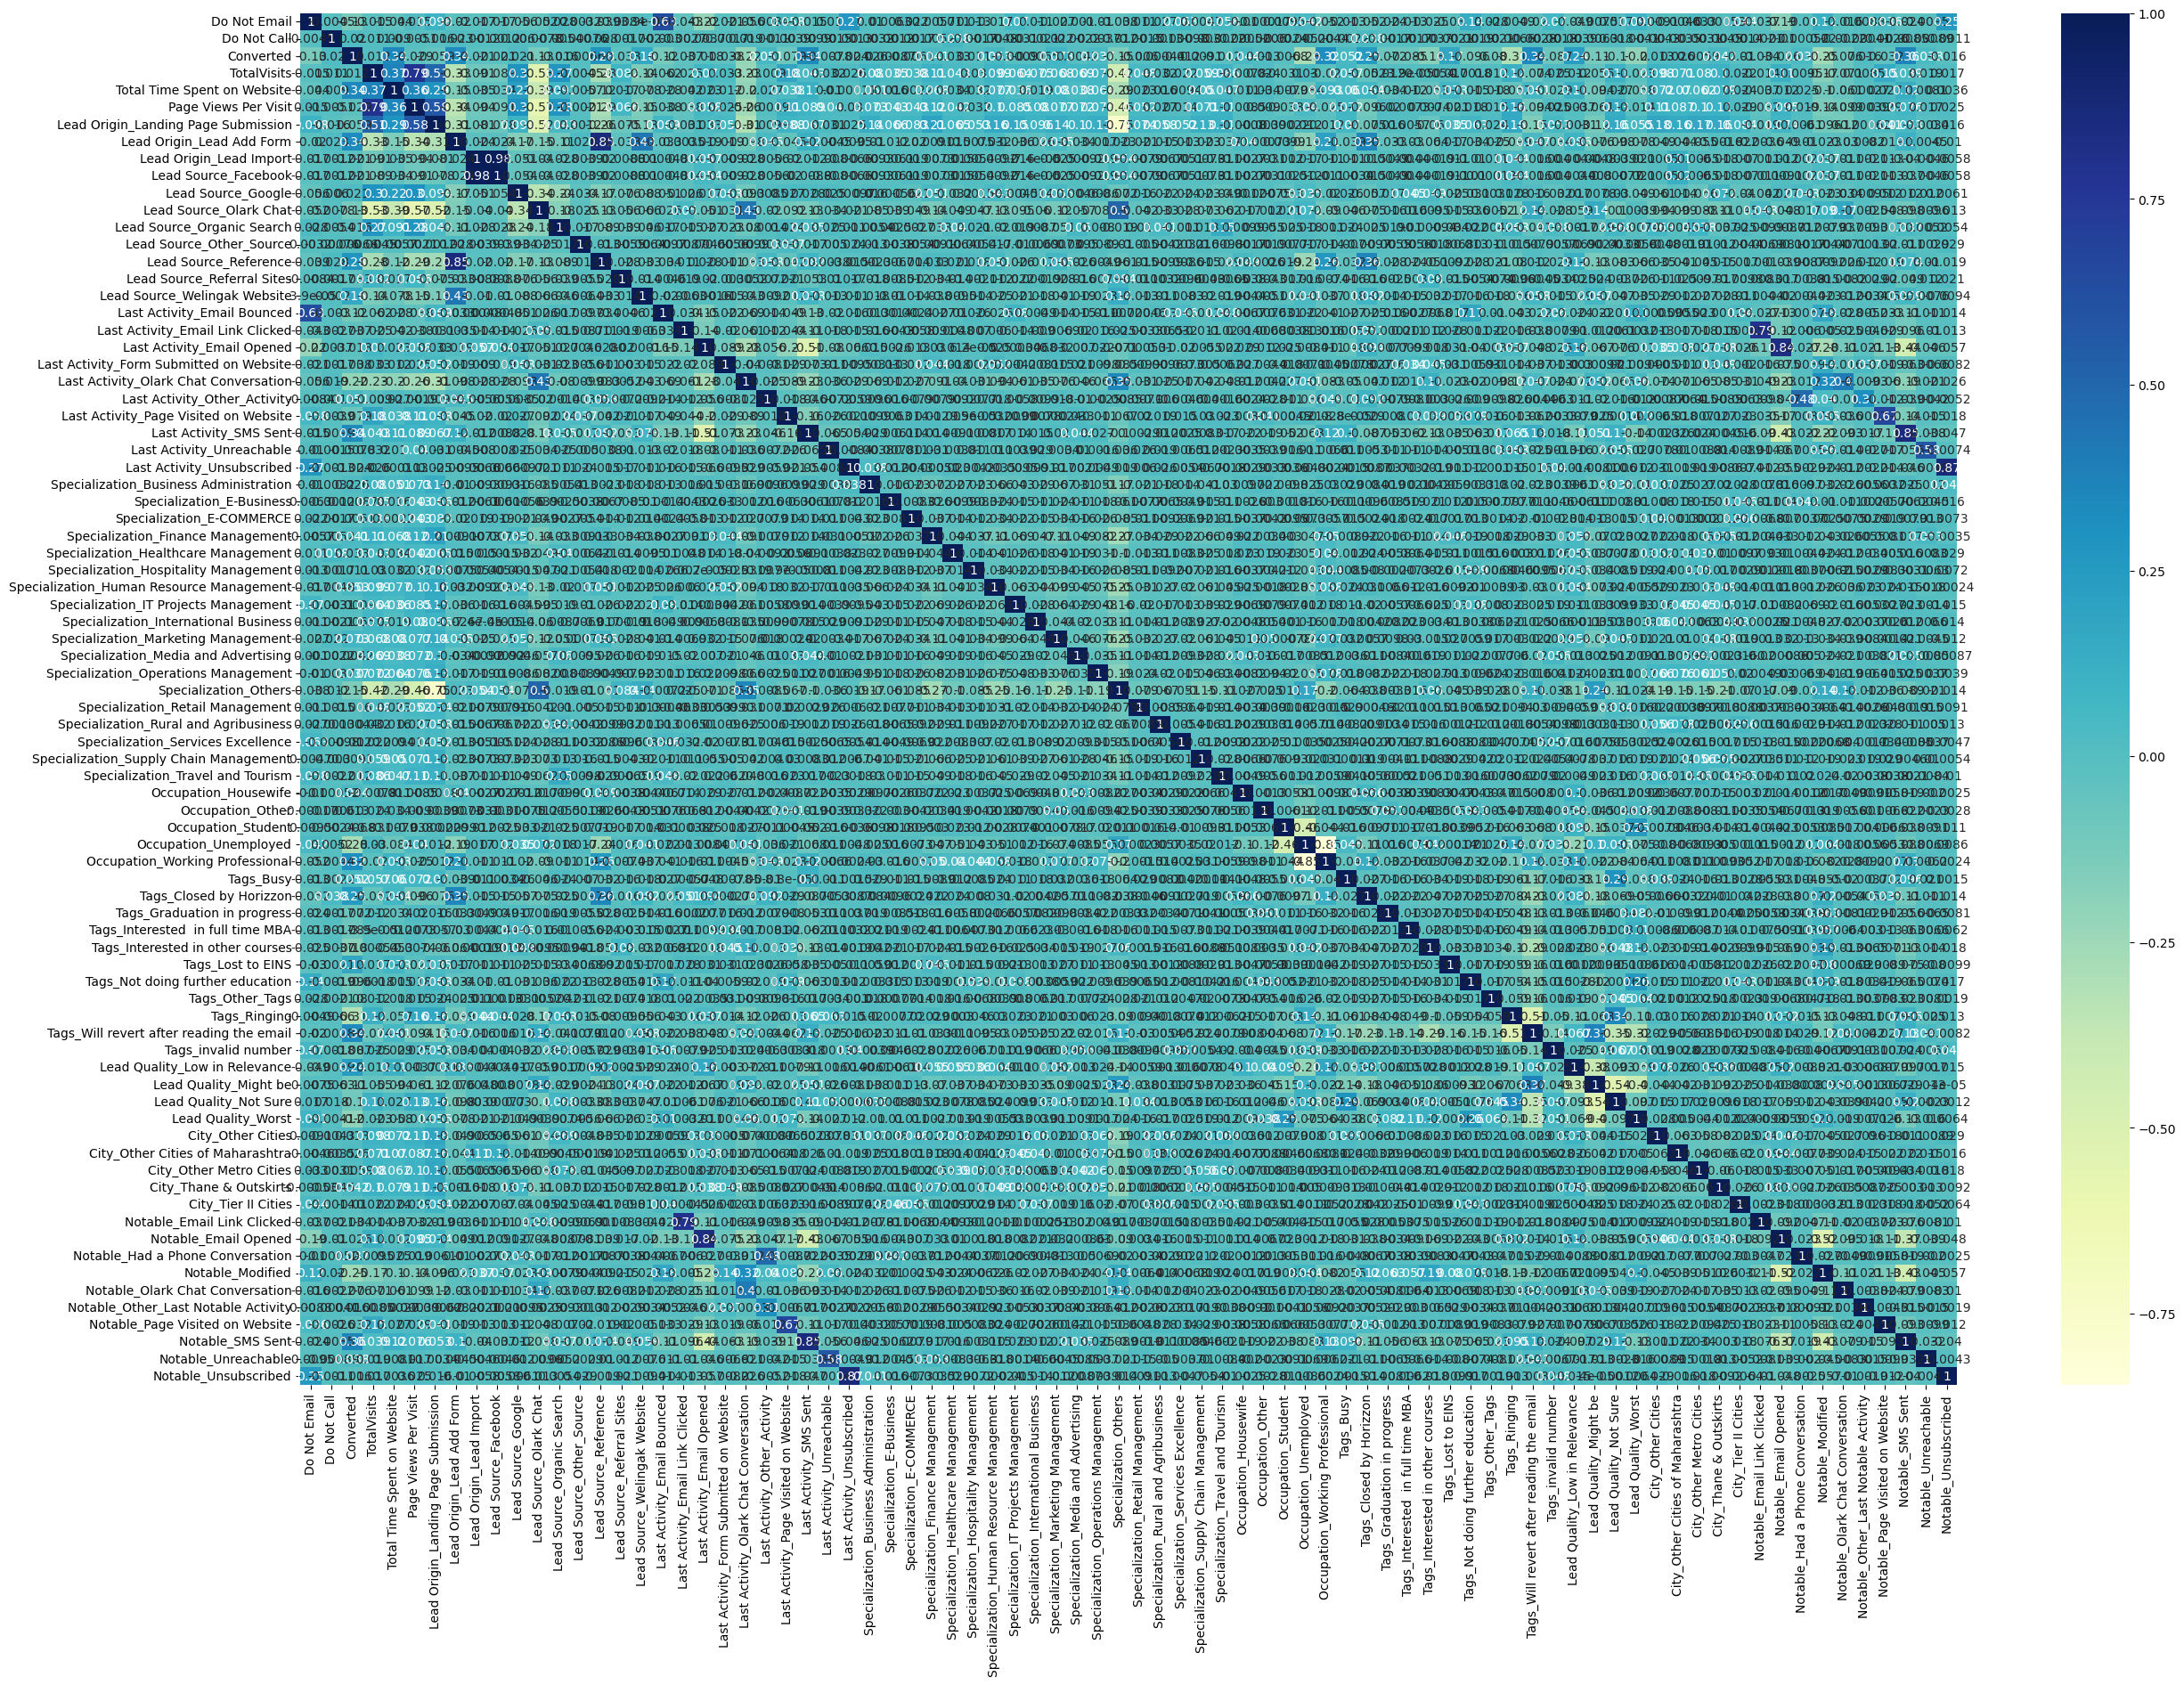

In [117]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(lead_df.corr(numeric_only=True),cmap="YlGnBu",annot = True)
plt.show()

##### It is difficult to infer anything from the above figure hence let us take the output to a dataframe and analyze the same 

In [118]:
#Creating a dataframe
lead_df_corr = lead_df.corr(numeric_only=True)

In [119]:
#Checking the variables which are highly correlated with others
high_corr = lead_df_corr[(lead_df_corr>0.5)&(lead_df_corr!=1)].abs().max()
print(high_corr[~high_corr.isna()])

Do Not Email                             0.634624
TotalVisits                              0.787851
Page Views Per Visit                     0.787851
Lead Origin_Landing Page Submission      0.575937
Lead Origin_Lead Add Form                0.850403
Lead Origin_Lead Import                  0.981014
Lead Source_Facebook                     0.981014
Lead Source_Olark Chat                   0.503659
Lead Source_Reference                    0.850403
Last Activity_Email Bounced              0.634624
Last Activity_Email Link Clicked         0.794052
Last Activity_Email Opened               0.840972
Last Activity_Page Visited on Website    0.666906
Last Activity_SMS Sent                   0.852135
Last Activity_Unreachable                0.578747
Last Activity_Unsubscribed               0.872613
Specialization_Others                    0.503659
Notable_Email Link Clicked               0.794052
Notable_Email Opened                     0.840972
Notable_Page Visited on Website          0.666906


##### We can see that the above variables are highly correlated with each other. We will proceed ahead with model building using RFE and based upon p-values decide to drop the highly related variables 

##### Step 7 : Model Building

##### Running first training model

In [120]:
import statsmodels.api as sm

In [121]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5969
Model:                            GLM   Df Residuals:                     5889
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1303.3
Date:                Sun, 20 Oct 2024   Deviance:                       2606.6
Time:                        18:50:13   Pearson chi2:                 3.42e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5857
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        1.1902      2.009      0.592      0.554      -2.748       5.129
Do Not Email                                -1.1859      0.302     -3.932      0.000      -1.777      -0.595
Do Not Call                                 21.7260   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
TotalVisits                                  0.1671      0.085      1.962      0.050       0.000       0.334
Total Time Spent on Website                  1.0843      0.061     17.788      0.000       0.965       1.204
Page Views Per Visit                        -0.1777      0.094     -1.896      0.058      -0.362       0.006
Lead Origin_Landing Page Submission         -0.8438      0.216     -3.909      0.000      -1.267      -0.421
Lead Origin_Lead Add Form                    3.7008      0.798      4.635      0.000       2.136       5.266
Lead Origin_Lead Import                      2.1013      2.048      1.026      0.305      -1.913       6.116
Lead Source_Facebook                        -1.4465      2.048     -0.706      0.480      -5.461       2.568
Lead Source_Google                           0.1844      0.152      1.216      0.224      -0.113       0.482
Lead Source_Olark Chat                       0.9582      0.238      4.024      0.000       0.491       1.425
Lead Source_Organic Search                   0.2869      0.213      1.346      0.178      -0.131       0.705
Lead Source_Other_Source                    -0.1444      0.809     -0.178      0.858      -1.730       1.441
Lead Source_Reference                       -1.4642      0.870     -1.682      0.093      -3.170       0.242
Lead Source_Referral Sites                   0.3747      0.446      0.841      0.400      -0.499       1.248
Lead Source_Welingak Website                 1.3358      1.082      1.234      0.217      -0.786       3.457
Last Activity_Email Bounced                 -0.3881      0.681     -0.570      0.569      -1.723       0.947
Last Activity_Email Link Clicked             0.0020      0.729      0.003      0.998      -1.426       1.430
Last Activity_Email Opened                   0.0793      0.380      0.209      0.835      -0.666       0.825
Last Activity_Form Submitted on Website     -0.3720      0.623     -0.597      0.551      -1.593       0.849
Last Activity_Olark Chat Conversation       -0.2200      0.372     -0.592      0.554      -0.948       0.508
Last Activity_Other_Activity                -0.0411      1.016     -0.040      0.968      -2.032       1.950
Last Activity_Page Visited on Website        0.0785      0.473      0.166      0.868      -0.848       1.005
Last Activity_SMS Sent                       1.3068      0.343      3.805      0.000       0.634       1.980
Last Activity_Unreachable      

##### Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).Let us now use RFE to identify the 15 most relevant features

##### Step 8 : Feature selection using RFE

In [122]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [123]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [124]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False])

In [125]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('Do Not Call', False, 51),
 ('TotalVisits', False, 46),
 ('Total Time Spent on Website', False, 10),
 ('Page Views Per Visit', False, 45),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Source_Facebook', False, 58),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Olark Chat', False, 16),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Other_Source', False, 64),
 ('Lead Source_Reference', False, 18),
 ('Lead Source_Referral Sites', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 33),
 ('Last Activity_Email Link Clicked', False, 29),
 ('Last Activity_Email Opened', False, 50),
 ('Last Activity_Form Submitted on Website', False, 38),
 ('Last Activity_Olark Chat Conversation', False, 21),
 ('Last Activity_Other_Activity', False, 27),
 ('Last Activity_Page Visited on Website', False, 39),
 ('Last Activity

In [126]:
col = X_train.columns[rfe.support_]

In [127]:
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Notable_SMS Sent'],
      dtype='object')

In [128]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other_Source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality

##### Assessing the model with StatsModels

In [129]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5969
Model:                            GLM   Df Residuals:                     5953
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1649.4
Date:                Sun, 20 Oct 2024   Deviance:                       3298.7
Time:                        18:50:19   Pearson chi2:                 2.20e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5347
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9256      0.286     -6.742      0.000      -2.485      -1.366
Lead Origin_Lead Add Form                    1.8032      0.309      5.828      0.000       1.197       2.410
Lead Source_Welingak Website                 2.3170      0.789      2.936      0.003       0.770       3.864
Occupation_Working Professional              2.6041      0.235     11.096      0.000       2.144       3.064
Tags_Busy                                    2.5552      0.376      6.790      0.000       1.818       3.293
Tags_Closed by Horizzon                      9.0183      1.058      8.520      0.000       6.944      11.093
Tags_Interested  in full time MBA          -22.6339   2.16e+04     -0.001      0.999   -4.24e+04    4.24e+04
Tags_Lost to EINS                            8.8021      0.656     13.415      0.000       7.516      10.088
Tags_Not doing further education           -23.2490   1.83e+04     -0.001      0.999   -3.59e+04    3.59e+04
Tags_Ringing                                -1.3090      0.373     -3.514      0.000      -2.039      -0.579
Tags_Will revert after reading the email     4.4693      0.296     15.077      0.000       3.888       5.050
Tags_invalid number                         -1.9430      1.062     -1.830      0.067      -4.024       0.138
Lead Quality_Might be                       -3.8711      0.222    -17.473      0.000      -4.305      -3.437
Lead Quality_Not Sure                       -1.7803      0.304     -5.860      0.000      -2.376      -1.185
Lead Quality_Worst                          -3.4194      0.704     -4.854      0.000      -4.800      -2.039
Notable_SMS Sent                             2.8973      0.117     24.745      0.000       2.668       3.127
============================================================================================================
"""

In [130]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
594848    2.095927e-01
620731    8.277692e-01
622204    8.277692e-01
590929    2.095927e-01
637500    8.277692e-01
622608    9.271485e-01
618565    8.197950e-04
601654    2.095927e-01
631150    3.817519e-13
587760    2.095927e-01
dtype: float64

In [131]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.09592676e-01, 8.27769154e-01, 8.27769154e-01, 2.09592676e-01,
       8.27769154e-01, 9.27148545e-01, 8.19795001e-04, 2.09592676e-01,
       3.81751903e-13, 2.09592676e-01])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [132]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number
0          0        0.209593       594848
1          1        0.827769       620731
2          1        0.827769       622204
3          0        0.209593       590929
4          1        0.827769       637500

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [133]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted
0          0        0.209593       594848          0
1          1        0.827769       620731          1
2          1        0.827769       622204          1
3          0        0.209593       590929          0
4          1        0.827769       637500          1

In [134]:
from sklearn import metrics

In [135]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3621  140]
 [ 445 1763]]


In [136]:
# Predicted     not_converted    converted
# Actual
# not_converted        3621      140
# converted            445       1763  

In [137]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9019936337745016


##### Checking VIFs

In [138]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                     Lead Quality_Might be  4.38
9   Tags_Will revert after reading the email  4.11
8                               Tags_Ringing  2.10
12                     Lead Quality_Not Sure  1.80
0                  Lead Origin_Lead Add Form  1.66
14                          Notable_SMS Sent  1.50
1               Lead Source_Welingak Website  1.30
4                    Tags_Closed by Horizzon  1.24
3                                  Tags_Busy  1.23
2            Occupation_Working Professional  1.21
13                        Lead Quality_Worst  1.13
7           Tags_Not doing further education  1.11
6                          Tags_Lost to EINS  1.08
10                       Tags_invalid number  1.08
5          Tags_Interested  in full time MBA  1.05

In [140]:
# The VIF's are below 5 but the p-value is high for the variables - Tags_Interested in full time MBA and Tags_Not doing further education
# Let us drop one variable - Tags_Not doing further education and re-run the model

In [141]:
# Dropping 'Tags_Not doing further education' as p-value is 0.999
col = col.drop('Tags_Not doing further education')

In [142]:
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Notable_SMS Sent'],
      dtype='object')

In [143]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5969
Model:                            GLM   Df Residuals:                     5954
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1653.4
Date:                Sun, 20 Oct 2024   Deviance:                       3306.7
Time:                        18:50:20   Pearson chi2:                 2.20e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5341
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0794      0.283     -7.335      0.000      -2.635      -1.524
Lead Origin_Lead Add Form                    1.7318      0.304      5.695      0.000       1.136       2.328
Lead Source_Welingak Website                 2.3857      0.787      3.030      0.002       0.843       3.929
Occupation_Working Professional              2.5798      0.233     11.082      0.000       2.124       3.036
Tags_Busy                                    2.6596      0.378      7.030      0.000       1.918       3.401
Tags_Closed by Horizzon                      9.1574      1.058      8.653      0.000       7.083      11.232
Tags_Interested  in full time MBA          -21.4675   1.31e+04     -0.002      0.999   -2.57e+04    2.57e+04
Tags_Lost to EINS                            8.9305      0.656     13.608      0.000       7.644      10.217
Tags_Ringing                                -1.2009      0.375     -3.206      0.001      -1.935      -0.467
Tags_Will revert after reading the email     4.5990      0.297     15.491      0.000       4.017       5.181
Tags_invalid number                         -1.8372      1.063     -1.729      0.084      -3.920       0.246
Lead Quality_Might be                       -3.8446      0.220    -17.507      0.000      -4.275      -3.414
Lead Quality_Not Sure                       -1.7273      0.304     -5.684      0.000      -2.323      -1.132
Lead Quality_Worst                          -3.4066      0.702     -4.855      0.000      -4.782      -2.031
Notable_SMS Sent                             2.9011      0.117     24.746      0.000       2.671       3.131
============================================================================================================
"""

In [144]:
# again checking the VIF now:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10                     Lead Quality_Might be  4.31
8   Tags_Will revert after reading the email  4.06
7                               Tags_Ringing  2.08
11                     Lead Quality_Not Sure  1.78
0                  Lead Origin_Lead Add Form  1.66
13                          Notable_SMS Sent  1.50
1               Lead Source_Welingak Website  1.30
4                    Tags_Closed by Horizzon  1.24
3                                  Tags_Busy  1.23
2            Occupation_Working Professional  1.21
6                          Tags_Lost to EINS  1.08
9                        Tags_invalid number  1.08
5          Tags_Interested  in full time MBA  1.05
12                        Lead Quality_Worst  1.03

In [145]:
##### Again we have low VIF and high p-value for Tags_Interested in full time MBA.

In [146]:
# Dropping 'Tags_Interested in full time MBA' as p-value is 0.999
col = col.drop('Tags_Interested  in full time MBA')

##### Model 4

In [147]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5969
Model:                            GLM   Df Residuals:                     5955
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1656.3
Date:                Sun, 20 Oct 2024   Deviance:                       3312.5
Time:                        18:50:21   Pearson chi2:                 2.22e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5337
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2136      0.283     -7.823      0.000      -2.768      -1.659
Lead Origin_Lead Add Form                    1.7366      0.302      5.752      0.000       1.145       2.328
Lead Source_Welingak Website                 2.3790      0.786      3.025      0.002       0.838       3.920
Occupation_Working Professional              2.5275      0.228     11.108      0.000       2.082       2.974
Tags_Busy                                    2.7673      0.379      7.302      0.000       2.024       3.510
Tags_Closed by Horizzon                      9.2766      1.058      8.765      0.000       7.202      11.351
Tags_Lost to EINS                            9.0452      0.657     13.771      0.000       7.758      10.332
Tags_Ringing                                -1.0939      0.375     -2.915      0.004      -1.829      -0.358
Tags_Will revert after reading the email     4.7193      0.297     15.870      0.000       4.136       5.302
Tags_invalid number                         -1.7359      1.063     -1.633      0.102      -3.819       0.348
Lead Quality_Might be                       -3.8290      0.218    -17.529      0.000      -4.257      -3.401
Lead Quality_Not Sure                       -1.7004      0.303     -5.611      0.000      -2.294      -1.106
Lead Quality_Worst                          -3.3356      0.704     -4.735      0.000      -4.716      -1.955
Notable_SMS Sent                             2.9049      0.117     24.748      0.000       2.675       3.135
============================================================================================================
"""

In [148]:
# again checking the VIF now:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                      Lead Quality_Might be  4.21
7   Tags_Will revert after reading the email  4.00
6                               Tags_Ringing  2.06
10                     Lead Quality_Not Sure  1.75
0                  Lead Origin_Lead Add Form  1.66
12                          Notable_SMS Sent  1.50
1               Lead Source_Welingak Website  1.30
4                    Tags_Closed by Horizzon  1.24
3                                  Tags_Busy  1.22
2            Occupation_Working Professional  1.21
5                          Tags_Lost to EINS  1.07
8                        Tags_invalid number  1.07
11                        Lead Quality_Worst  1.01

##### Again we have low VIF and high p-value for Tags_invalid number

In [149]:
# Dropping 'Tags_invalid number' as p-value is 0.102
col = col.drop('Tags_invalid number')

In [150]:
##### Model 5

In [151]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5969
Model:                            GLM   Df Residuals:                     5956
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1658.3
Date:                Sun, 20 Oct 2024   Deviance:                       3316.7
Time:                        18:50:21   Pearson chi2:                 2.23e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5333
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3396      0.283     -8.258      0.000      -2.895      -1.784
Lead Origin_Lead Add Form                    1.7347      0.302      5.747      0.000       1.143       2.326
Lead Source_Welingak Website                 2.3802      0.786      3.027      0.002       0.839       3.921
Occupation_Working Professional              2.5542      0.229     11.136      0.000       2.105       3.004
Tags_Busy                                    3.0014      0.365      8.212      0.000       2.285       3.718
Tags_Closed by Horizzon                      9.4431      1.057      8.932      0.000       7.371      11.515
Tags_Lost to EINS                            9.2179      0.655     14.084      0.000       7.935      10.501
Tags_Ringing                                -0.8530      0.360     -2.368      0.018      -1.559      -0.147
Tags_Will revert after reading the email     4.8903      0.292     16.735      0.000       4.318       5.463
Lead Quality_Might be                       -3.8717      0.221    -17.490      0.000      -4.306      -3.438
Lead Quality_Not Sure                       -1.8097      0.300     -6.041      0.000      -2.397      -1.223
Lead Quality_Worst                          -3.4180      0.705     -4.849      0.000      -4.799      -2.036
Notable_SMS Sent                             2.8816      0.116     24.841      0.000       2.654       3.109
============================================================================================================
"""

In [152]:
# again checking the VIF now:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8                      Lead Quality_Might be  4.07
7   Tags_Will revert after reading the email  3.88
6                               Tags_Ringing  1.99
9                      Lead Quality_Not Sure  1.68
0                  Lead Origin_Lead Add Form  1.66
11                          Notable_SMS Sent  1.49
1               Lead Source_Welingak Website  1.30
4                    Tags_Closed by Horizzon  1.24
2            Occupation_Working Professional  1.21
3                                  Tags_Busy  1.21
5                          Tags_Lost to EINS  1.07
10                        Lead Quality_Worst  1.00

#####Again we have low VIF and high p-value for Tags_Ringing

In [153]:
# Dropping 'Tags_invalid number' as p-value is 0.102
col = col.drop('Tags_Ringing')

##### Model 6

In [154]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5969
Model:                            GLM   Df Residuals:                     5957
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1661.1
Date:                Sun, 20 Oct 2024   Deviance:                       3322.2
Time:                        18:50:21   Pearson chi2:                 2.19e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5329
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6490      0.270     -9.827      0.000      -3.177      -2.121
Lead Origin_Lead Add Form                    1.7007      0.297      5.718      0.000       1.118       2.284
Lead Source_Welingak Website                 2.4144      0.785      3.077      0.002       0.877       3.952
Occupation_Working Professional              2.6095      0.232     11.235      0.000       2.154       3.065
Tags_Busy                                    3.5436      0.299     11.864      0.000       2.958       4.129
Tags_Closed by Horizzon                      9.8689      1.045      9.441      0.000       7.820      11.918
Tags_Lost to EINS                            9.6282      0.637     15.105      0.000       8.379      10.877
Tags_Will revert after reading the email     5.3223      0.243     21.875      0.000       4.845       5.799
Lead Quality_Might be                       -3.9916      0.227    -17.613      0.000      -4.436      -3.547
Lead Quality_Not Sure                       -2.0455      0.291     -7.030      0.000      -2.616      -1.475
Lead Quality_Worst                          -3.1952      0.725     -4.405      0.000      -4.617      -1.774
Notable_SMS Sent                             2.8425      0.114     24.946      0.000       2.619       3.066
============================================================================================================
"""

In [155]:
# again checking the VIF now:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6   Tags_Will revert after reading the email  2.82
7                      Lead Quality_Might be  2.70
0                  Lead Origin_Lead Add Form  1.65
10                          Notable_SMS Sent  1.45
1               Lead Source_Welingak Website  1.30
4                    Tags_Closed by Horizzon  1.23
2            Occupation_Working Professional  1.21
8                      Lead Quality_Not Sure  1.19
3                                  Tags_Busy  1.12
5                          Tags_Lost to EINS  1.05
9                         Lead Quality_Worst  1.00

##### As can be seen above the VIF and p-values are within aceptable limits , so we need not drop any more variables and we can proceed with making predictions using this model only

In [156]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
594848    0.211105
620731    0.821159
622204    0.821159
590929    0.211105
637500    0.821159
622608    0.935432
618565    0.001305
601654    0.211105
631150    0.002888
587760    0.211105
dtype: float64

In [157]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21110549, 0.82115906, 0.82115906, 0.21110549, 0.82115906,
       0.93543179, 0.00130463, 0.21110549, 0.00288828, 0.21110549])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [158]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number
0          0        0.211105       594848
1          1        0.821159       620731
2          1        0.821159       622204
3          0        0.211105       590929
4          1        0.821159       637500

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [159]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

#Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted
0          0        0.211105       594848          0
1          1        0.821159       620731          1
2          1        0.821159       622204          1
3          0        0.211105       590929          0
4          1        0.821159       637500          1

##### Let us calculate the various metrics

In [160]:
# Confusion matrix 
print('Metrics for cutoff:',0.5)
print('-'*50)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print('confusion metrics ')
print(confusion)
# Let's check the overall accuracy.
print('Accuracy', metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity ',TP / float(TP+FN))
# Let us calculate specificity
print('Specificity ',TN / float(TN+FP))
# Calculate false postive rate - predicting conversion when customer has not converted
print('False positive rate ',FP/ float(TN+FP))
# positive predictive value 
print ('Positive predictive value',TP / float(TP+FP))
# Negative predictive value
print ('Negative predictive value',TN / float(TN+ FN))

Metrics for cutoff: 0.5
--------------------------------------------------
confusion metrics 
[[3626  135]
 [ 445 1763]]
Accuracy 0.9028312950242922
Sensitivity  0.7984601449275363
Specificity  0.9641052911459718
False positive rate  0.035894708854028186
Positive predictive value 0.928872497365648
Negative predictive value 0.8906902480962908


#####  As seen above the sensitivity of our logistic regression model is ~80%(0.798).
That means of all the conversions we have correctly identified 80%.

##### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [161]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [162]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

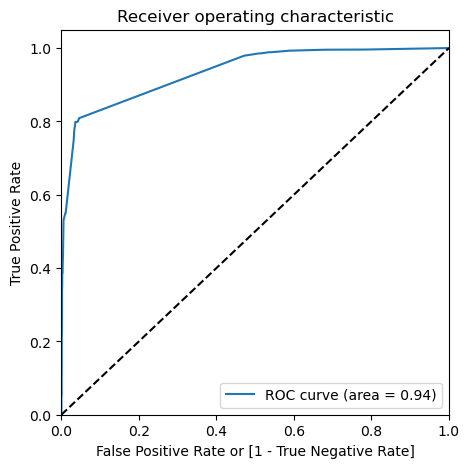

In [163]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

##### The model looks good as it far away from the diagonal. 94% area is covered under the curve.

##### Step 10: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [164]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.211105       594848          0    1    1    1    0    0   
1          1        0.821159       620731          1    1    1    1    1    1   
2          1        0.821159       622204          1    1    1    1    1    1   
3          0        0.211105       590929          0    1    1    1    0    0   
4          1        0.821159       637500          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    1    1    1    0  
2    1    1    1    1    0  
3    0    0    0    0    0  
4    1    1    1    1    0

In [165]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.369911  1.000000  0.000000
0.1   0.1  0.669961  0.985507  0.484712
0.2   0.2  0.695091  0.979167  0.528317
0.3   0.3  0.899481  0.798913  0.958522
0.4   0.4  0.899648  0.798913  0.958788
0.5   0.5  0.902831  0.798460  0.964105
0.6   0.6  0.899313  0.787591  0.964903
0.7   0.7  0.897303  0.779438  0.966498
0.8   0.8  0.887083  0.748641  0.968359
0.9   0.9  0.823589  0.532609  0.994416


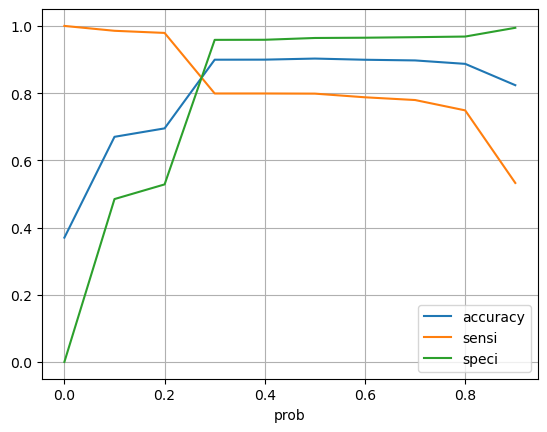

In [166]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

##### The accuracy, sensitivity and specificity lines are intersecting at 0.3 probability. So, we will proceed with this value.

##### Evaluating the model with optimal probability cutoff as 0.3

In [167]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.211105       594848          0    1    1    1    0    0   
1          1        0.821159       620731          1    1    1    1    1    1   
2          1        0.821159       622204          1    1    1    1    1    1   
3          0        0.211105       590929          0    1    1    1    0    0   
4          1        0.821159       637500          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    1    1    1    1    0                1  
2    1    1    1    1    0                1  
3    0    0    0    0    0                0  
4    1    1    1    1    0                1

In [168]:
#Lets check the various metrics
print('Metrics at threshold 0.3')
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print('confusion metrics')
print(confusion2)
print('Accuracy ',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity ',TP / float(TP+FN))
# Let us calculate specificity
print('Specificity ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False positive rate ',(FP/ float(TN+FP)))
# Positive predictive value 
print('Positive predictive value', (TP / float(TP+FP)))
# Negative predictive value
print('Negative predictive value ', (TN / float(TN+ FN)))

Metrics at threshold 0.3
confusion metrics
[[3605  156]
 [ 444 1764]]
Accuracy  0.8994806500251299
Sensitivity  0.7989130434782609
Specificity  0.9585216697686786
False positive rate  0.041478330231321456
Positive predictive value 0.91875
Negative predictive value  0.890343294640652


##### As seen above the sensitivity of our logistic regression model is still ~80%(0.798).

##### Precision and Recall

In [169]:
#Looking at the confusion matrix again

In [170]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3626,  135],
       [ 445, 1763]], dtype=int64)

##### Precision
TP / TP + FP

In [171]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.928872497365648

##### Recall
TP / TP + FN

In [172]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7984601449275363

##### Using sklearn utilities for the same

In [173]:
from sklearn.metrics import precision_score, recall_score

In [174]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.928872497365648

In [175]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7984601449275363

##### Precision and recall tradeoff

In [176]:
from sklearn.metrics import precision_recall_curve

In [177]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       1
 3       0
 4       1
        ..
 5964    0
 5965    0
 5966    0
 5967    0
 5968    1
 Name: Converted, Length: 5969, dtype: int64,
 0       0
 1       1
 2       1
 3       0
 4       1
        ..
 5964    0
 5965    0
 5966    0
 5967    0
 5968    1
 Name: predicted, Length: 5969, dtype: int64)

In [178]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

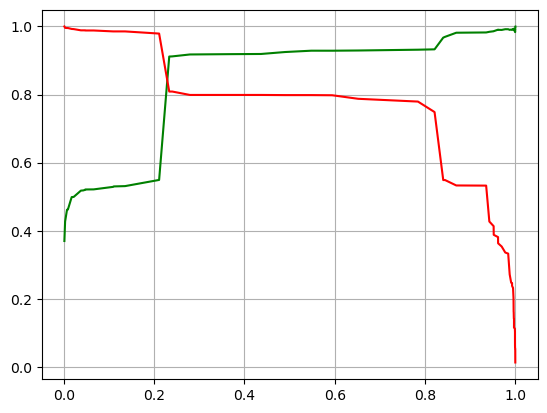

In [179]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid()
plt.show()

In [180]:
##### As seen from above the Precision and recall tradeoff is happening at a theshold of 0.23

In [181]:
# Let us calculate the metrics at the above threshold

In [182]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.23 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.211105       594848          0    1    1    1    0    0   
1          1        0.821159       620731          1    1    1    1    1    1   
2          1        0.821159       622204          1    1    1    1    1    1   
3          0        0.211105       590929          0    1    1    1    0    0   
4          1        0.821159       637500          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    1    1    1    1    0                1  
2    1    1    1    1    0                1  
3    0    0    0    0    0                0  
4    1    1    1    1    0                1

In [183]:
#Lets check the various metrics
print('Metrics at threshold 0.23')
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print('confusion metrics')
print(confusion2)
print('Accuracy ',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity ',TP / float(TP+FN))
# Let us calculate specificity
print('Specificity ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False positive rate ',(FP/ float(TN+FP)))
# Positive predictive value 
print('Positive predictive value', (TP / float(TP+FP)))
# Negative predictive value
print('Negative predictive value ', (TN / float(TN+ FN)))

Metrics at threshold 0.23
confusion metrics
[[3588  173]
 [ 422 1786]]
Accuracy  0.9003183112749205
Sensitivity  0.8088768115942029
Specificity  0.9540015953203935
False positive rate  0.04599840467960649
Positive predictive value 0.9116896375701888
Negative predictive value  0.8947630922693267


##### As seen above at the value of 0.23 the metircs are better hence we will take this as the optimal value and proceed to make predictions on the test set

##### Step 11: Making predictions on the test set

In [184]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [185]:
X_test = X_test[col]
X_test.head()

Lead Origin_Lead Add Form  Lead Source_Welingak Website  \
Lead Number                                                            
617228                               0                             0   
622914                               0                             0   
619060                               0                             0   
652305                               0                             0   
583585                               0                             0   

             Occupation_Working Professional  Tags_Busy  \
Lead Number                                               
617228                                     0          0   
622914                                     0          0   
619060                                     0          0   
652305                                     0          0   
583585                                     0          0   

             Tags_Closed by Horizzon  Tags_Lost to EINS  \
Lead Number                                               
617228                             0                  0   
622914                             0                  0   
619060                             0                  0   
652305                             0                  0   
583585                             0                  0   

             Tags_Will revert after reading the email  Lead Quality_Might be  \
Lead Number                                                                    
617228                                              1                      1   
622914                                              0                      1   
619060                                              1                      1   
652305                                              1                      1   
583585                                              1                      1   

             Lead Quality_Not Sure  Lead Quality_Worst  Notable_SMS Sent  
Lead Number                                                               
617228                           0                   0                 1  
622914                           0                   0                 0  
619060                           0                   0                 0  
652305                           0                   0                 0  
583585                           0                   0                 0

In [186]:
X_test_sm = sm.add_constant(X_test)

##### Making predictions on the test set

In [187]:
y_test_pred = res.predict(X_test_sm)

In [188]:
y_test_pred[:10]

Lead Number
617228    0.821159
622914    0.001305
619060    0.211105
652305    0.211105
583585    0.211105
622488    0.211105
605335    0.999323
648813    0.594449
645291    0.001305
658527    0.211105
dtype: float64

In [189]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [190]:
# Let's see the head
y_pred_1.head()

0
Lead Number          
617228       0.821159
622914       0.001305
619060       0.211105
652305       0.211105
583585       0.211105

In [191]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [192]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [193]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [194]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [195]:
y_pred_final.head()

Converted  Lead Number         0
0          1       617228  0.821159
1          0       622914  0.001305
2          0       619060  0.211105
3          1       652305  0.211105
4          0       583585  0.211105

In [196]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [197]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [198]:
# Let's see the head of y_pred_final
y_pred_final.head()

Lead Number  Converted  Converted_Prob
0       617228          1        0.821159
1       622914          0        0.001305
2       619060          0        0.211105
3       652305          1        0.211105
4       583585          0        0.211105

In [199]:
# Creating predicted column with 0.23 probability cutoff
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.23 else 0)

In [200]:
y_pred_final.head()

Lead Number  Converted  Converted_Prob  final_predicted
0       617228          1        0.821159                1
1       622914          0        0.001305                0
2       619060          0        0.211105                0
3       652305          1        0.211105                0
4       583585          0        0.211105                0

In [201]:
#Lets check the various metrics
print('Metrics at threshold 0.23')
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
print('confusion metrics')
print(confusion2)
print('Accuracy ',metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity ',TP / float(TP+FN))
# Let us calculate specificity
print('Specificity ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('False positive rate ',(FP/ float(TN+FP)))
# Positive predictive value 
print('Positive predictive value', (TP / float(TP+FP)))
# Negative predictive value
print('Negative predictive value ', (TN / float(TN+ FN)))

Metrics at threshold 0.23
confusion metrics
[[1502   71]
 [ 178  808]]
Accuracy  0.902696365767878
Sensitivity  0.8194726166328601
Specificity  0.9548633184996821
False positive rate  0.04513668150031786
Positive predictive value 0.919226393629124
Negative predictive value  0.8940476190476191


##### Sensitivity of the prediction over test data set is 82%

##### Now let us compute the lead score for each of the leads

Lead Score = 100 * ConversionProbability

In [202]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final
leads_test_pred.head()

Lead Number  Converted  Converted_Prob  final_predicted
0       617228          1        0.821159                1
1       622914          0        0.001305                0
2       619060          0        0.211105                0
3       652305          1        0.211105                0
4       583585          0        0.211105                0

In [203]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final
leads_train_pred.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.211105       594848          0    1    1    1    0    0   
1          1        0.821159       620731          1    1    1    1    1    1   
2          1        0.821159       622204          1    1    1    1    1    1   
3          0        0.211105       590929          0    1    1    1    0    0   
4          1        0.821159       637500          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    1    1    1    1    0                1  
2    1    1    1    1    0                1  
3    0    0    0    0    0                0  
4    1    1    1    1    0                1

In [204]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['Lead Number','Converted','Converted_Prob','final_predicted']]
leads_train_pred.head()

Lead Number  Converted  Converted_Prob  final_predicted
0       594848          0        0.211105                0
1       620731          1        0.821159                1
2       622204          1        0.821159                1
3       590929          0        0.211105                0
4       637500          1        0.821159                1

In [205]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = pd.concat([leads_train_pred, leads_test_pred])
lead_full_pred.head()

Lead Number  Converted  Converted_Prob  final_predicted
0       594848          0        0.211105                0
1       620731          1        0.821159                1
2       622204          1        0.821159                1
3       590929          0        0.211105                0
4       637500          1        0.821159                1

In [206]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(5969, 4)
(2559, 4)
(8528, 4)


In [207]:
# Ensuring the Lead Numbers are unique for each lead in the finl dataframe
len(lead_full_pred['Lead Number'].unique().tolist())

8528

In [208]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

Lead Number  Converted  Converted_Prob  final_predicted  Lead_Score
0       594848          0        0.211105                0          21
1       620731          1        0.821159                1          82
2       622204          1        0.821159                1          82
3       590929          0        0.211105                0          21
4       637500          1        0.821159                1          82

In [209]:
# Inspecing the max Lead Number
lead_full_pred['Lead Number'].max()

660737

In [210]:
# Making the Lead Number column as index
lead_full_pred = lead_full_pred.set_index('Lead Number').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

Converted  Converted_Prob  final_predicted  Lead_Score
Lead Number                                                        
579533               1        0.211105                0          21
579538               1        0.821159                1          82
579545               0        0.135639                0          14
579546               0        0.021923                0           2
579615               1        0.211105                0          21

In [211]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Origin_Lead Add Form                   1.70
Lead Source_Welingak Website                2.41
Occupation_Working Professional             2.61
Tags_Busy                                   3.54
Tags_Closed by Horizzon                     9.87
Tags_Lost to EINS                           9.63
Tags_Will revert after reading the email    5.32
Lead Quality_Might be                      -3.99
Lead Quality_Not Sure                      -2.05
Lead Quality_Worst                         -3.20
Notable_SMS Sent                            2.84
dtype: float64

In [212]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Origin_Lead Add Form                   17.23
Lead Source_Welingak Website                24.46
Occupation_Working Professional             26.44
Tags_Busy                                   35.91
Tags_Closed by Horizzon                    100.00
Tags_Lost to EINS                           97.56
Tags_Will revert after reading the email    53.93
Lead Quality_Might be                      -40.45
Lead Quality_Not Sure                      -20.73
Lead Quality_Worst                         -32.38
Notable_SMS Sent                            28.80
dtype: float64

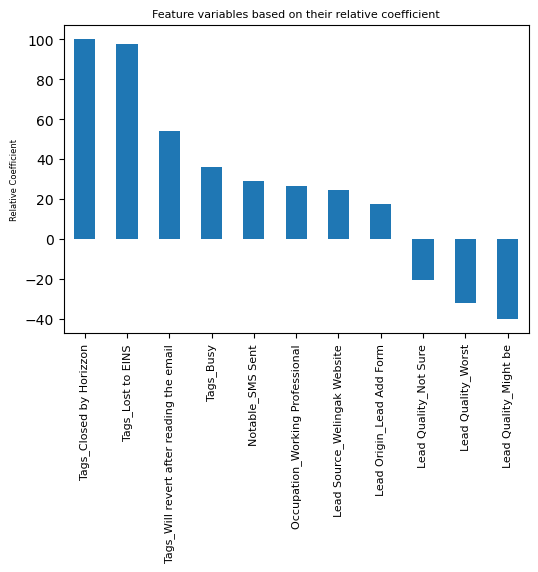

In [213]:
# Plot showing the feature variables based on their relative coefficient values
plt.figure(figsize = (6,4))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient',fontsize=8)
plt.ylabel('Relative Coefficient',fontsize=6)
plt.xticks(fontsize=8)
plt.show()

##### Selecting Top 3 features which contribute most towards the probability of a lead getting converted

In [214]:
# First let us convert into a dataframe
feature_ranking = pd.DataFrame(feature_importance)
feature_ranking.head()

0
Lead Origin_Lead Add Form        17.23
Lead Source_Welingak Website     24.46
Occupation_Working Professional  26.44
Tags_Busy                        35.91
Tags_Closed by Horizzon         100.00

In [215]:
#Let us select the Top 3 features that contribute most towards the probability of a lead getting converted
feature_ranking.sort_values(by=0,ascending=False).head(3)

0
Tags_Closed by Horizzon                  100.00
Tags_Lost to EINS                         97.56
Tags_Will revert after reading the email  53.93

In [216]:
#Let us select the Bottom 3 features i.e. that need improvement to convert a lead
feature_ranking.sort_values(by=0,ascending=True).head(3)

0
Lead Quality_Might be -40.45
Lead Quality_Worst    -32.38
Lead Quality_Not Sure -20.73